# This is the identify index for set 4
## for current I_fi, I_so1, Iso_2, I_si

Equations for currents of 3V simplified model

<img src="so1so2.png">

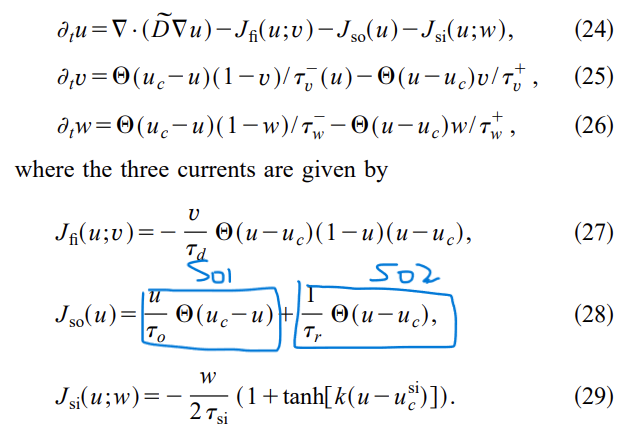

In [1]:
from IPython.display import Image
Image('so1so2.png')
#Equations for currents of 3V simplified model

## Here volatge and $I_{x}$ are from one single cell in 2D model

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

v = []

Ifi = []
Iso1 = []
Iso2 = []
Isi = []

with open('v_currents_p1_set1.csv') as csv_file: # totally 100 points
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        for i in range(1,len(row)):
            if i % 5 == 1 :
                v.append(float(row[i]))
            if i % 5 == 2 :
                Ifi.append(float(row[i]))
            if i % 5 == 3 :
                Iso1.append(float(row[i]))
            if i % 5 == 4 :
                Iso2.append(float(row[i]))
            if i % 5 == 0 :
                Isi.append(float(row[i]))

## Plots of volatge and $I_{fi}$

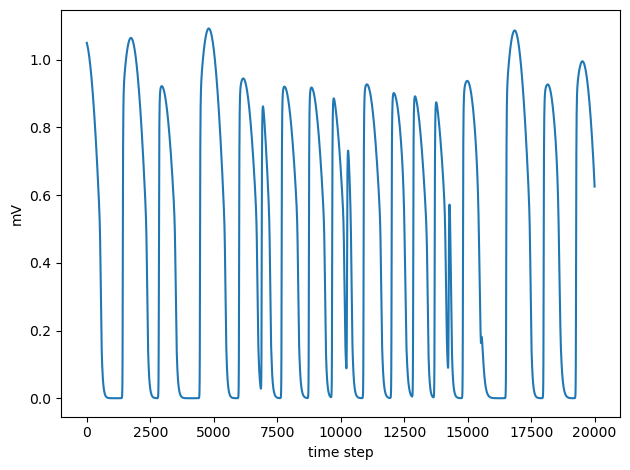

In [13]:
plt.plot(v)
plt.xlabel('time step')
plt.ylabel('mV')
plt.tight_layout()

plt.savefig('ICC V')


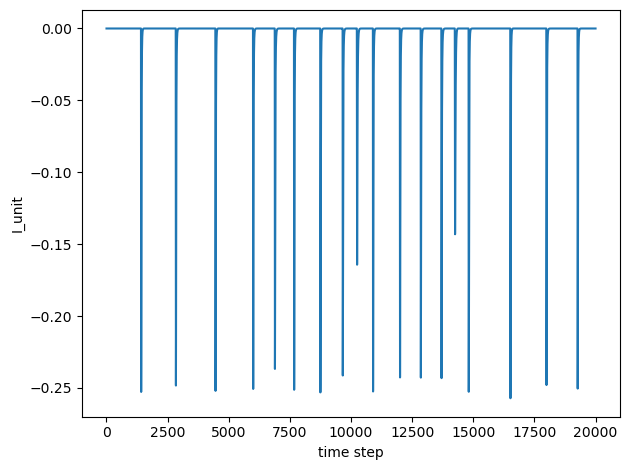

In [18]:
plt.plot(Ifi)
plt.xlabel('time step')
plt.ylabel('I_unit')
plt.tight_layout()

plt.savefig('ICC Ifi')

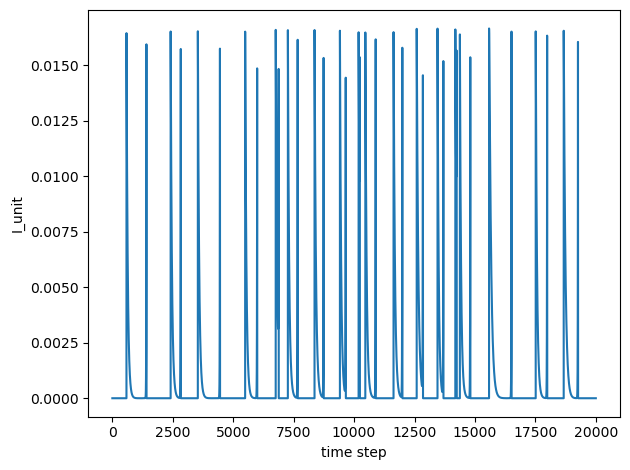

In [14]:
plt.plot(Iso1)
plt.xlabel('time step')
plt.ylabel('I_unit')
plt.tight_layout()

plt.savefig('ICC Iso1')

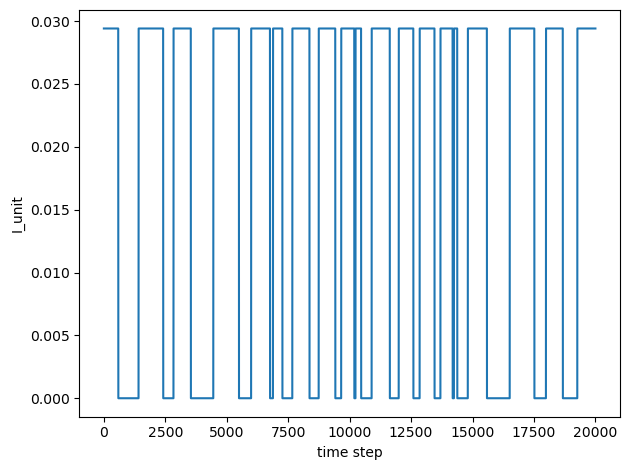

In [15]:
plt.plot(Iso2)
plt.xlabel('time step')
plt.ylabel('I_unit')
plt.tight_layout()

plt.savefig('ICC Iso2')

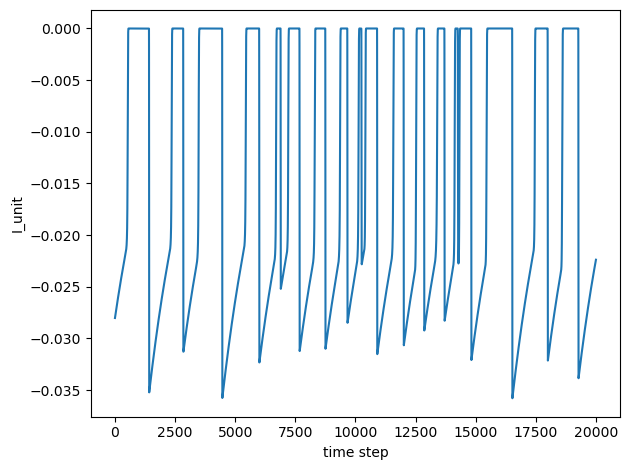

In [16]:
plt.plot(Isi)
plt.xlabel('time step')
plt.ylabel('I_unit')
plt.tight_layout()

plt.savefig('ICC Isi')

In [17]:
matrix = np.zeros((len(Ifi),4))

In [20]:
for i in range(len(Ifi)):
    for j in range(4):
        if j % 4 == 0 :
            matrix[i][j] = Ifi[i]
        if j % 4 == 1 :
            matrix[i][j] = Iso1[i]
        if j % 4 == 2 :
            matrix[i][j] = Iso2[i]
        if j % 4 == 3 :
            matrix[i][j] = Isi[i]

In [21]:
U, S, V = np.linalg.svd(matrix)

# Here you can see the singular values in matrix S

In [22]:
S

array([4.41958676, 3.41710917, 0.7203722 , 0.39930762])

In [23]:
V

array([[-4.46974088e-01, -1.11022302e-16,  6.86721291e-01,
        -5.73260876e-01],
       [ 8.94380546e-01,  0.00000000e+00,  3.30708533e-01,
        -3.01189816e-01],
       [ 1.72511960e-02,  8.60422844e-16,  6.47337419e-01,
         7.62008308e-01],
       [ 0.00000000e+00,  1.00000000e+00, -6.66133815e-16,
        -6.66133815e-16]])

In [24]:
U

array([[ 8.20531641e-03,  5.31676881e-03, -3.21638251e-03, ...,
        -7.74166502e-05, -7.73493625e-05, -7.72810864e-05],
       [ 8.20323936e-03,  5.31535739e-03, -3.19944382e-03, ...,
        -7.74410358e-05, -7.73740024e-05, -7.73059844e-05],
       [ 8.20116376e-03,  5.31394694e-03, -3.18251695e-03, ...,
        -9.20663714e-03, -9.20670574e-03, -9.20677534e-03],
       ...,
       [ 7.47707056e-03,  4.82190146e-03,  2.72257393e-03, ...,
         9.99914033e-01, -8.59884785e-05, -8.60106677e-05],
       [ 7.47526121e-03,  4.82067194e-03,  2.73732953e-03, ...,
        -8.59878532e-05,  9.99913990e-01, -8.60323568e-05],
       [ 7.47342527e-03,  4.81942436e-03,  2.75230186e-03, ...,
        -8.60094079e-05, -8.60317223e-05,  9.99913946e-01]])

# Now calculate the projection onto the span space
## I did not actually calculate the voltage perturbation effect due to time, i just assume last two singular vectors are insensitive perturbation since their singular values are smaller

The formula for span projection is as follows:

<img src="span projection.png">


## What's more, when we perturb current, it can be approximately seen as perturbing tau parameter related to currents, since the reciprocal of parameters is proportional to currents for example:

$$
I_{fi} \rightarrow (1 + \epsilon)I_{fi} \iff \tau_d \rightarrow \frac{\tau_d}{1 + \epsilon}
$$

where $\epsilon$ is a small value

Therefore, we can say, for the identify index $Index$:
$$Index(I_{fi}) \approx  Index(\tau_d), \text{here } I_{fi} \text{ and } \tau_d \text{ should be vector form.}$$

Where:
$$Index(e) = k(e) = ||e - P_se||$$

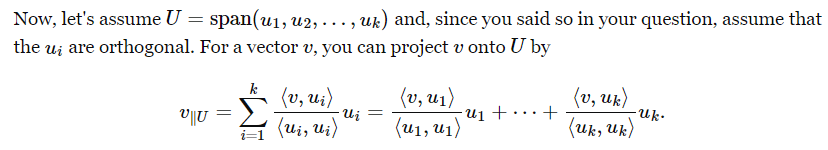

In [72]:
# The formula for span projection is as follows
Image('span projection.png')

In [29]:
# index I_fi = index (1,0,0,0)

def projection_S(v):
    
    ps = [0,0,0,0]
    
    for i in range(2,len(V)):
        ps += np.inner(v,V[i]) / np.inner(V[i],V[i]) * V[i]
    return ps



v_I_fi = [1,0,0,0]
v_I_so1 = [0,1,0,0]
v_I_so2 = [0,0,1,0]
v_I_si = [0,0,0,1]

k_fi = np.linalg.norm(v_I_fi-projection_S(v_I_fi))
k_so1 = np.linalg.norm(v_I_so1-projection_S(v_I_so1))
k_so2 = np.linalg.norm(v_I_so2-projection_S(v_I_so2))
k_si = np.linalg.norm(v_I_si-projection_S(v_I_si))

In [30]:
print(k_fi,k_so1,k_so2,k_si)

0.9998511870459251 1.1065238959956769e-16 0.7622035593855571 0.6475672457921586


## So now, we get their identify index (based on singular vector 3 and 4):
$$
k(I_{fi}) = k(\tau_{d}) \approx 1
$$

$$
k(I_{so1}) = k(\tau_{o}) \approx 0
$$

$$
k(I_{so2}) = k(\tau_{r}) = 0.76
$$

$$
k(I_{si}) = k(\tau_{si}) = 0.65
$$

$$
shape \rightarrow velocity
$$

In [ ]:
matrix = [x1,x2,..,x9]

svd

\epsilon 1 , 1+epsilon

singular value 

singular vector  = [1,0,0], [1,1,0]

[1/,1/,0]

x1 to x1 * (1+e/)
x2 to x2 * (1+e/)

